In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Import the requests library
import requests

#Import the API key
from config import weather_api_key

### Create Latitude and Longitude Combinations

In [2]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
#Create a list for holding the cities
cities = []
#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

608

## 6.2.6 Get the City Weather Data

In [6]:
#Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6d66aa9d628b1271daa5baed23258f3


In [7]:
#Import the datetime module from the datetime library
from datetime import datetime

In [8]:
#Create an empty list to hold the weather data
city_data = []
#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


### Loop Through the List of Cities and Build the City URL

In [9]:
#Loop through all the cities in the list
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count
    record_count += 1

#Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | tautira
Processing Record 2 of Set 1 | bull savanna
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | necochea
Processing Record 8 of Set 1 | mbaiki
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | tromso
Processing Record 11 of Set 1 | artemisa
Processing Record 12 of Set 1 | mount isa
Processing Record 13 of Set 1 | barcelos
Processing Record 14 of Set 1 | kedougou
Processing Record 15 of Set 1 | sawtell
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | kaitangata
Processing Record 18 of Set 1 | rock sound
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | pevek
Processing Record 22 of Set 1 | buenavista
Processing Record 23 of Set 1 | moron
Processing Record 24 of Set 1 | saint-ph

Processing Record 41 of Set 4 | sulangan
Processing Record 42 of Set 4 | kapaa
Processing Record 43 of Set 4 | smithers
Processing Record 44 of Set 4 | alpena
Processing Record 45 of Set 4 | concepcion
Processing Record 46 of Set 4 | ozinki
Processing Record 47 of Set 4 | saint-augustin
Processing Record 48 of Set 4 | zhuanghe
Processing Record 49 of Set 4 | esperance
Processing Record 50 of Set 4 | pustoshka
Processing Record 1 of Set 5 | hobyo
Processing Record 2 of Set 5 | jiexiu
Processing Record 3 of Set 5 | lumut
Processing Record 4 of Set 5 | jinka
Processing Record 5 of Set 5 | doha
Processing Record 6 of Set 5 | bluff
Processing Record 7 of Set 5 | chop
Processing Record 8 of Set 5 | ekhabi
Processing Record 9 of Set 5 | aktash
Processing Record 10 of Set 5 | lawrenceburg
Processing Record 11 of Set 5 | aktau
Processing Record 12 of Set 5 | stokmarknes
Processing Record 13 of Set 5 | yerbogachen
Processing Record 14 of Set 5 | kodiak
Processing Record 15 of Set 5 | ranong
Proc

Processing Record 32 of Set 8 | mount darwin
Processing Record 33 of Set 8 | shubarshi
Processing Record 34 of Set 8 | kabare
Processing Record 35 of Set 8 | jacareacanga
Processing Record 36 of Set 8 | whitehorse
Processing Record 37 of Set 8 | slave lake
Processing Record 38 of Set 8 | fort nelson
Processing Record 39 of Set 8 | ambilobe
Processing Record 40 of Set 8 | ahuimanu
Processing Record 41 of Set 8 | dhidhdhoo
Processing Record 42 of Set 8 | eskasem
City not found. Skipping...
Processing Record 43 of Set 8 | halalo
City not found. Skipping...
Processing Record 44 of Set 8 | jumla
Processing Record 45 of Set 8 | basco
Processing Record 46 of Set 8 | cap-aux-meules
Processing Record 47 of Set 8 | satuk
Processing Record 48 of Set 8 | araouane
Processing Record 49 of Set 8 | badiraguato
Processing Record 50 of Set 8 | sambava
Processing Record 1 of Set 9 | arcachon
Processing Record 2 of Set 9 | schattdorf
Processing Record 3 of Set 9 | chiang khong
Processing Record 4 of Set 9

Processing Record 19 of Set 12 | walvis bay
Processing Record 20 of Set 12 | borama
City not found. Skipping...
Processing Record 21 of Set 12 | tarakan
Processing Record 22 of Set 12 | leova
Processing Record 23 of Set 12 | poum
Processing Record 24 of Set 12 | korla
Processing Record 25 of Set 12 | port hedland
Processing Record 26 of Set 12 | gaogou
Processing Record 27 of Set 12 | bobo dioulasso
Processing Record 28 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 29 of Set 12 | jinxiang
Processing Record 30 of Set 12 | bacolod
Processing Record 31 of Set 12 | hirara
Processing Record 32 of Set 12 | gualaquiza
Processing Record 33 of Set 12 | kuching
Processing Record 34 of Set 12 | praya
Processing Record 35 of Set 12 | port-cartier
Processing Record 36 of Set 12 | sevnica
Processing Record 37 of Set 12 | makakilo city
Processing Record 38 of Set 12 | dunmore town
Processing Record 39 of Set 12 | bulgan
Processing Record 40 of Set 12 | farah
Processing Record 41 

## 6.2.7 Create a DataFrame of City Weather Data

In [10]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tautira,-17.7333,-149.1500,78.80,73,75,3.44,PF,2021-02-07 17:37:55
1,Bull Savanna,17.8868,-77.5902,80.51,65,5,19.13,JM,2021-02-07 17:37:56
2,Mataura,-46.1927,168.8643,50.13,89,98,1.70,NZ,2021-02-07 17:37:56
3,Qaanaaq,77.4840,-69.3632,11.64,87,99,4.79,GL,2021-02-07 17:34:53
4,Dikson,73.5069,80.5464,-30.84,85,89,11.70,RU,2021-02-07 17:37:56
5,Vaini,-21.2000,-175.2000,77.00,94,75,8.05,TO,2021-02-07 17:37:56
6,Necochea,-38.5473,-58.7368,60.01,93,88,18.79,AR,2021-02-07 17:37:56
7,Mbaiki,3.8678,17.9892,78.58,22,65,1.50,CF,2021-02-07 17:37:56
8,Tromso,69.6496,18.9570,26.60,74,75,16.11,NO,2021-02-07 17:37:57
9,Artemisa,22.8140,-82.7561,84.20,61,75,11.50,CU,2021-02-07 17:37:57


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tautira,PF,2021-02-07 17:37:55,-17.7333,-149.1500,78.80,73,75,3.44
1,Bull Savanna,JM,2021-02-07 17:37:56,17.8868,-77.5902,80.51,65,5,19.13
2,Mataura,NZ,2021-02-07 17:37:56,-46.1927,168.8643,50.13,89,98,1.70
3,Qaanaaq,GL,2021-02-07 17:34:53,77.4840,-69.3632,11.64,87,99,4.79
4,Dikson,RU,2021-02-07 17:37:56,73.5069,80.5464,-30.84,85,89,11.70
5,Vaini,TO,2021-02-07 17:37:56,-21.2000,-175.2000,77.00,94,75,8.05
6,Necochea,AR,2021-02-07 17:37:56,-38.5473,-58.7368,60.01,93,88,18.79
7,Mbaiki,CF,2021-02-07 17:37:56,3.8678,17.9892,78.58,22,65,1.50
8,Tromso,NO,2021-02-07 17:37:57,69.6496,18.9570,26.60,74,75,16.11
9,Artemisa,CU,2021-02-07 17:37:57,22.8140,-82.7561,84.20,61,75,11.50


In [12]:
#Create the output file (CSV)
output_data_file = "Weather_Data/cities.csv"
#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

## 6.3.1 Plot Latitude vs. Temperature
### Get Data for Plotting

In [13]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

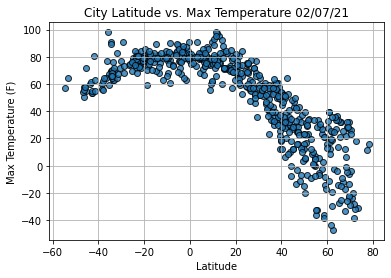

In [14]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Weather_Data/Fig1.png")

#Show plot
plt.show()

## 6.3.2 Plot Latitude vs. Humidity

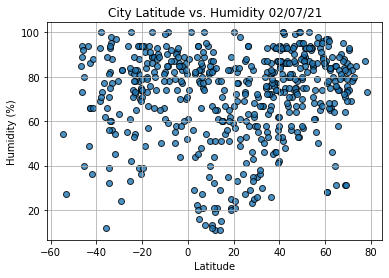

In [15]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Weather_Data/Fig2.png")

#Show plot
plt.show()

## 6.3.3 Plot Latitude vs. Cloudiness

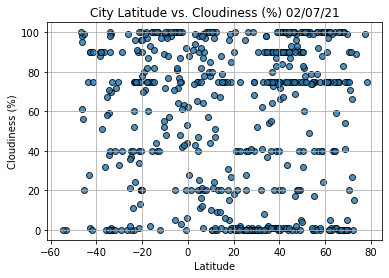

In [16]:
#Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Weather_Data/Fig3.png")

#Show plot
plt.show()

## 6.3.4 Plot Latitude vs. Wind Speed

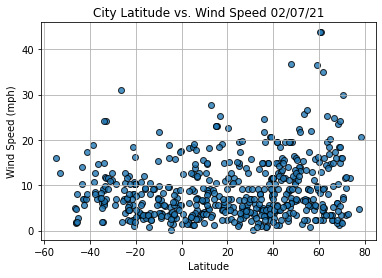

In [17]:
#Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Weather_Data/Fig4.png")

# Show plot
plt.show()

## 6.4.2 Find the Correlation Between Latitude and Maximum Temperature
### Create a Linear Regression Function

In [18]:
#Import linregress
from scipy.stats import linregress

#Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    #Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

### Create the Hemisphere DataFrames

In [19]:
index13 = city_data_df.loc[13]
index13

City                      Sawtell
Country                        AU
Date          2021-02-07 17:37:57
Lat                      -30.3833
Lng                         153.1
Max Temp                     71.6
Humidity                       78
Cloudiness                     75
Wind Speed                  12.66
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
549     True
550     True
551     True
552     True
553    False
Name: Lat, Length: 554, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Bull Savanna,JM,2021-02-07 17:37:56,17.8868,-77.5902,80.51,65,5,19.13
3,Qaanaaq,GL,2021-02-07 17:34:53,77.4840,-69.3632,11.64,87,99,4.79
4,Dikson,RU,2021-02-07 17:37:56,73.5069,80.5464,-30.84,85,89,11.70
7,Mbaiki,CF,2021-02-07 17:37:56,3.8678,17.9892,78.58,22,65,1.50
8,Tromso,NO,2021-02-07 17:37:57,69.6496,18.9570,26.60,74,75,16.11


In [22]:
#Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

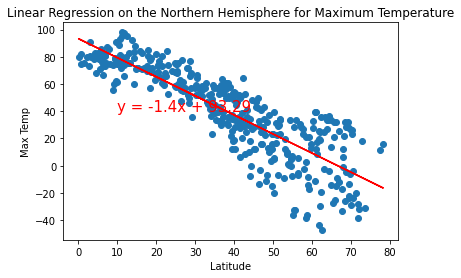

In [23]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

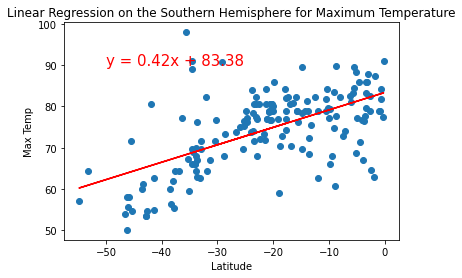

In [24]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

## 6.4.3 Find the Correlation Between Latitude and Percent Humidity
### Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

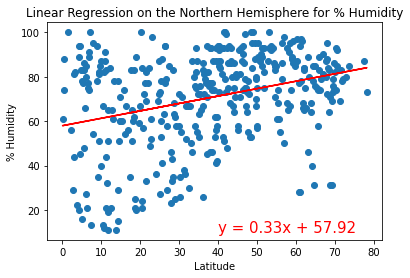

In [25]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

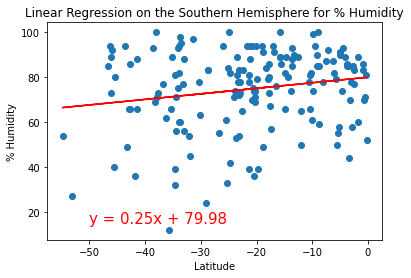

In [26]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

## 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness
#### Skill Drill

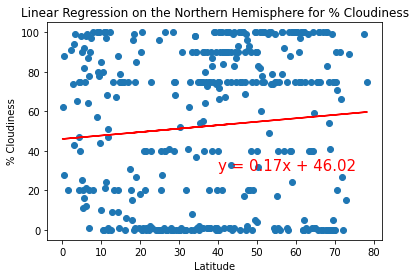

In [27]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,30))

### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

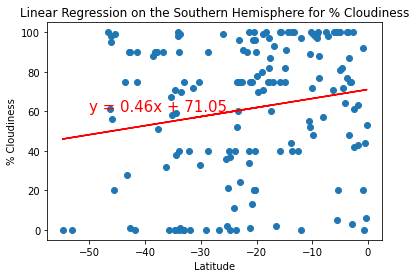

In [28]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

## 6.4.5 Find the Correlation Between Latitude and Wind Speed
### Perform Linear Regression on the Wind Speed for the Northern Hemisphere

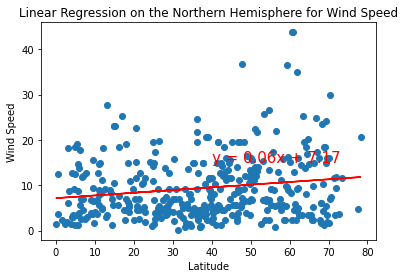

In [29]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,15))

### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

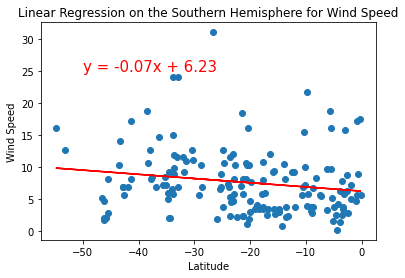

In [30]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,25))